In [11]:
import numpy as np
import os
import pandas as pd
import datetime

import matplotlib.pyplot as plt

from ovationpyme import ovation_prime
from ovationpyme import ovation_utilities


#### Set the date, auroral type and the parameter to calculate from call to OVATION
- Possible auroral types = 'diff', 'mono', 'wave'
- Possible parameters = 'energy', 'number'

In [20]:
datetime_ovation = datetime.datetime(2012,3,2,0,0)
a_type = 'diff'
param = 'energy'

In [21]:
estimator = ovation_prime.FluxEstimator(a_type,energy_or_number=param)
mlat_grid_ovation, mlt_grid_ovation, output_ovation = estimator.get_flux_for_time(datetime_ovation,
                                                                                  hemi='N',
                                                                                  return_dF=False,
                                                                                  combine_hemispheres=True,)

Cached OMNI called for 2012-03-02 00:00:00
Using cached OI: 2012-02-29 12:00:00-2012-03-03 12:00:00


In [22]:
output_ovation.max()

4.6886244938344905

#### Plot the outcome


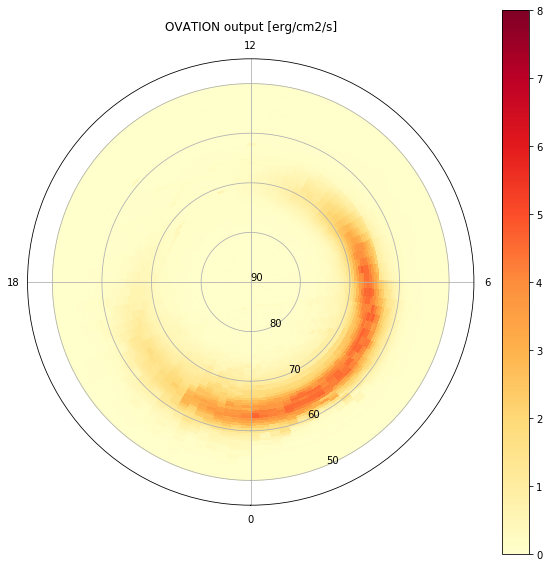

In [23]:
%matplotlib inline
# Redefine the grid for polar plotting (colatitude and MLT on 0-2*pi range)
mlat_plot_ovation = 90-np.abs(mlat_grid_ovation[:,0])
mlt_plot_ovation = mlt_grid_ovation[0,:].copy()
mlt_plot_ovation[mlt_plot_ovation < 0] = 24+mlt_plot_ovation[mlt_plot_ovation < 0]
mlt_plot_ovation_DMSPcompare = mlt_plot_ovation.copy()
mlt_plot_ovation = mlt_plot_ovation * 15. * (np.pi/180.)

if param == 'energy':
    colorbar_min = 0.0
    colorbar_max = 8.0
    
    levels = np.linspace(colorbar_min,colorbar_max,500)

    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)

    ctf = ax.pcolormesh(mlt_plot_ovation, mlat_plot_ovation, output_ovation,
                      vmin=colorbar_min,
                      vmax=colorbar_max, 
                      cmap='YlOrRd')
    cbar = fig.colorbar(ctf,ax=ax)#,extend='both')#,boundaries=[0,0.5,1.0,1.5],ticks=[0,0.5,1.0,1.5])
    cbar.set_clim(colorbar_min,colorbar_max)

    ax.set_title('OVATION output [erg/cm2/s]')
    
elif param == 'number':
    colorbar_min = 0.0
    colorbar_max = 1e9
    
    levels = np.linspace(colorbar_min,colorbar_max,500)

    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)

    ctf = ax.pcolormesh(mlt_plot_ovation, mlat_plot_ovation, output_ovation,
                      vmin=colorbar_min,
                      vmax=colorbar_max, 
                      cmap='YlOrRd')
    cbar = fig.colorbar(ctf,ax=ax)
    cbar.set_clim(colorbar_min,colorbar_max)

    ax.set_title('OVATION output [#/cm2/s]')


# Complete some visual changes

# define your axis limits
ax.set_ylim([0,45])

# Set the radius labels
ax.set_yticks(np.arange(0,50,10))  # less radial ticks
ax.set_yticklabels(90 - np.arange(0,50,10))  # less radial ticks

# Set the circumference labels
ax.set_xticks(np.linspace(0, 2*np.pi, 4, endpoint=False))
ax.set_xticklabels(('0','6','12','18'))      

ax.grid(True)
ax.set_theta_zero_location("S")

plt.show()

#### Calculate and sum all auroral types

In [26]:
auroral_flux_type = ['diff','mono','wave']

flag = False
for a_type in auroral_flux_type:
    print('\n-------------------------------------\n')
    print('working on auroral_flux_type = {}'.format(a_type))
    estimator = ovation_prime.FluxEstimator(a_type,energy_or_number=param)
    _, _, ovation_output_tmp = estimator.get_flux_for_time(datetime_ovation,
                                                           hemi='N',
                                                           return_dF=False,
                                                           combine_hemispheres=True,)

    if not flag:
        print('creating ovation_output_total array')
        ovation_output_total = ovation_output_tmp
        flag = True
    elif flag:
        print('growing ovation_output_total array')
        ovation_output_total = ovation_output_total + ovation_output_tmp


-------------------------------------

working on auroral_flux_type = diff
Cached OMNI called for 2012-03-02 00:00:00
Using cached OI: 2012-02-29 12:00:00-2012-03-03 12:00:00
creating ovation_output_total array

-------------------------------------

working on auroral_flux_type = mono
Cached OMNI called for 2012-03-02 00:00:00
Using cached OI: 2012-02-29 12:00:00-2012-03-03 12:00:00
growing ovation_output_total array

-------------------------------------

working on auroral_flux_type = wave
Cached OMNI called for 2012-03-02 00:00:00
Using cached OI: 2012-02-29 12:00:00-2012-03-03 12:00:00
growing ovation_output_total array


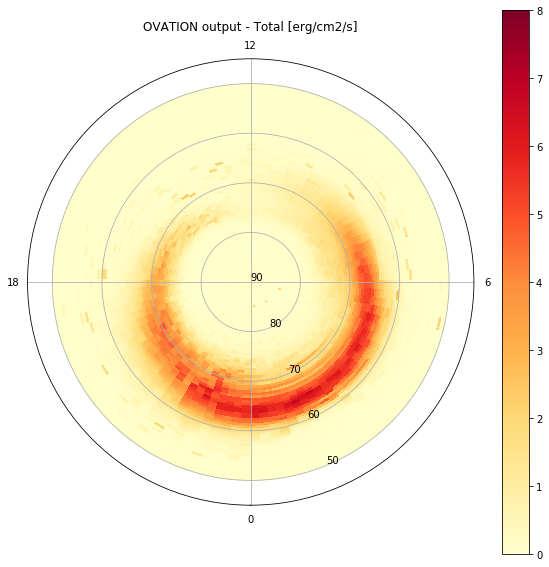

In [29]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)

ctf = ax.pcolormesh(mlt_plot_ovation, mlat_plot_ovation, ovation_output_total,
                    vmin=colorbar_min,
                    vmax=colorbar_max, 
                    cmap='YlOrRd')
cbar = fig.colorbar(ctf,ax=ax)
cbar.set_clim(colorbar_min,colorbar_max)

ax.set_title('OVATION output - Total [erg/cm2/s]')

# Complete some visual changes

# define your axis limits
ax.set_ylim([0,45])

# Set the radius labels
ax.set_yticks(np.arange(0,50,10))  # less radial ticks
ax.set_yticklabels(90 - np.arange(0,50,10))  # less radial ticks

# Set the circumference labels
ax.set_xticks(np.linspace(0, 2*np.pi, 4, endpoint=False))
ax.set_xticklabels(('0','6','12','18'))      

ax.grid(True)
ax.set_theta_zero_location("S")

plt.show()

#### A few notes
- The default behavior is to combine hemispheres - which is necessary due to data gaps; The code first checks for 'combine_hemispheres' and, in the case of 'True', averages the northern and southern hemispheres. The 'hemi' is still necessary to output the correct magnetic latitudes, but is otherwise not used if combining hemispheres
- Units of total energy flux are [ergs/cm^2/s]
- Units of total number flux are [#/cm^2/s]
- 'dF' is the newell coupling function used to parameterize OVATION
- ovationpyme provides plotting capabilities, demonstrated below.
- If we want to calculate the 'total' average energy, contributed to by all auroral types, the simplest solution is to sum up all of the energy and number fluxes contributed by each auroral type (flux type) and then calculate: average energy = all bands energy flux / all bands number flux
- Can compare with OVATION output [here](https://iswa.gsfc.nasa.gov/), though the comparison will not be direct


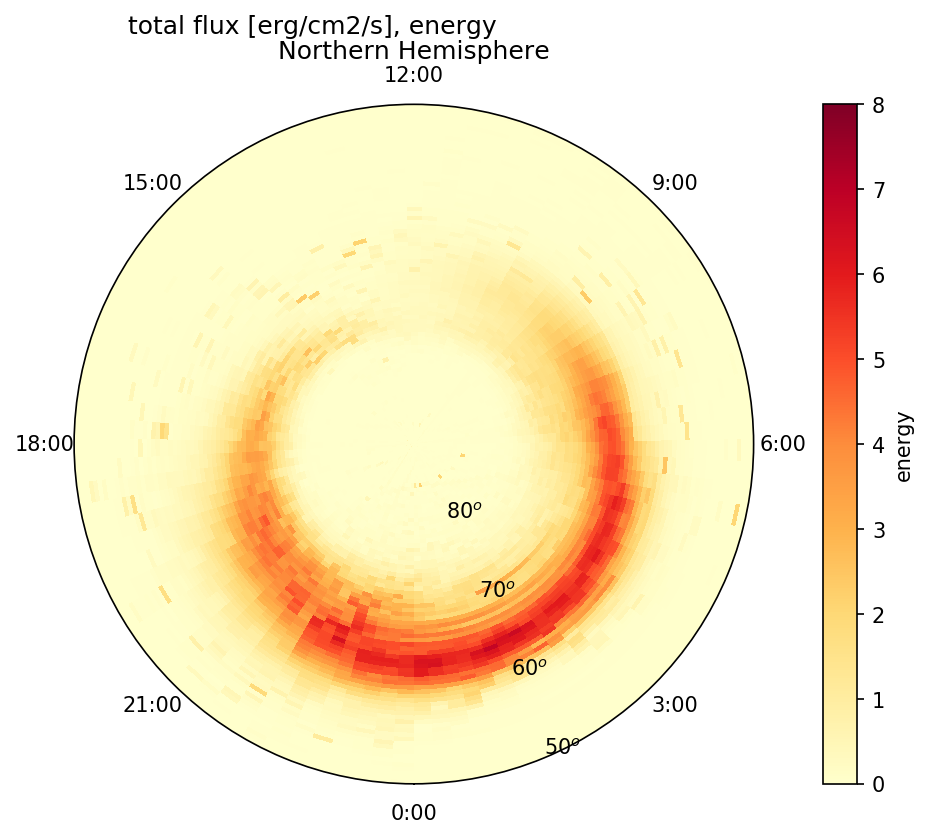

In [33]:
from ovationpyme.ovation_plotting import latlt2polar,polar2dial,pcolor_flux

f = plt.figure(figsize=(12,6),dpi=150)
axN = f.add_subplot(111,projection='polar')
mappableN = pcolor_flux(axN,
                        mlat_grid_ovation, 
                        mlt_grid_ovation,
                        ovation_output_total,
                        'N',
                        vmin=colorbar_min,
                        vmax=colorbar_max,
                        cmap='YlOrRd')
f.colorbar(mappableN,ax=axN,label='energy')
axN.set_title('Northern Hemisphere')
polar2dial(axN)
f.suptitle(('%s, %s' % ('total flux [erg/cm2/s]','energy') ) )
plt.show()
    
    